# Homework 1

For this homework, we are going to work with [Seoul Bike Sharing Demand dataset](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) from UCI. Our aim in this homework is to predict Rented Bike count. The homework is due Sunday, October 29th midnight.

# Task 1

Download the dataset. 

Read the dataset using pandas.read_csv function.

Make data cleaning and preliminary analysis on dataframe (check the column/row counts, check if the data has missing values, fill the missing values with a method you choose, check the data type of columns, generate descriptive statistics for columns, generate graphs for some columns-you could use pyplot/seaborn etc, check if the data has any outlier values in any column and handle these values if it has).

You can generate your own inputs using the given features if you want (bonus point). 

You can also apply feature selection if you want (bonus point) - hint: correlation between input columns.

Encode categorical features.

Split your data into train and test sets.

# Task 2

Apply a linear regression model. 
First, try to construct your model without scaling your data. 
Then, construct another model with scaled inputs. 
Calculate performance evaluation metrics (RMSE, MSE, R-squared) for each model.

# Task 3

Apply another algorithm (tree-based algorithm) to your dataset. Calculate performance evaluation (RMSE, MSE, R-squared) for this model.

# Task 4

Explain the calculated evaluation metrics and compare your results for each model you trained in previous tasks.

Make some suggestions to improve model performance (they could be changings in data preparation step, using another regression algorithm etc.), explain them.

# Notes

1. You must document each step of your tasks: what are you doing, why are you doing it, what problems you encountered and how you solved it. All of these must be explained and documented. Solutions without sufficient documentations will be penalized accordingly. 50% of your points will come from your code, while the other 50% will come from your explanations.

2. You can use MS Excel to inspect the files, but loading them up to python using pandas and inspecting them there under jupyter is easier.

3. For both of Task 2 and Task 3, you must split your data into a train and test set, and then evaluate the performance of your model on the test set.

For further questions, please contact busesonugelen@gmail.com and sinanmustu.sm@gmail.com

## Solutions

#### Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


#### Attribute Information:

Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#


## Task 1

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from itertools import combinations
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [22]:
data=pd.read_csv("./SeoulBikeData.csv",encoding='ISO-8859-1')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [23]:
#Eksik sütunları kontrol ediyoruz
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [24]:
#Aykırı değer kontrolü
Q1 = data.iloc[:,5].quantile(0.25)
Q3 = data.iloc[:,5].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırlar
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri gösteriyoruz
outliers = data[(data.iloc[:,5] < lower_bound) | (data.iloc[:,5] > upper_bound)]
outliers

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
82,04/12/2017,311,10,-1.1,40,4.5,2000,-13.0,0.64,0.0,0.0,Winter,No Holiday,Yes
84,04/12/2017,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,Winter,No Holiday,Yes
85,04/12/2017,391,13,0.0,30,5.4,1938,-15.5,1.17,0.0,0.0,Winter,No Holiday,Yes
86,04/12/2017,338,14,0.1,27,4.5,2000,-16.7,1.09,0.0,0.0,Winter,No Holiday,Yes
87,04/12/2017,341,15,-0.1,25,5.8,2000,-17.8,0.88,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,27/10/2018,1183,14,10.8,37,4.4,2000,-3.3,1.29,0.0,0.0,Autumn,No Holiday,Yes
7937,27/10/2018,1176,17,9.5,34,5.7,2000,-5.6,0.45,0.0,0.0,Autumn,No Holiday,Yes
7985,29/10/2018,1274,17,10.0,43,4.9,2000,-2.0,0.43,0.0,0.0,Autumn,No Holiday,Yes
8242,09/11/2018,0,10,11.3,68,4.7,1984,5.5,0.44,0.0,0.0,Autumn,No Holiday,No


In [25]:
#Aykırı değer kontrolü
Q1 = data.iloc[:,8].quantile(0.25)
Q3 = data.iloc[:,8].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırları hesaplıyoruz
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers = data[(data.iloc[:,8] < lower_bound) | (data.iloc[:,8] > upper_bound)]
outliers

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1741,11/02/2018,212,13,-2.4,28,3.0,1953,-18.4,2.35,0.0,0.0,Winter,No Holiday,Yes
1885,17/02/2018,193,13,-0.4,15,2.4,1938,-23.9,2.46,0.0,0.0,Winter,Holiday,Yes
1886,17/02/2018,258,14,-0.1,15,4.0,2000,-23.7,2.39,0.0,0.0,Winter,Holiday,Yes
1982,21/02/2018,365,14,3.3,14,2.9,1985,-21.7,2.49,0.0,0.0,Winter,No Holiday,Yes
2054,24/02/2018,454,14,6.9,19,1.9,1843,-15.1,2.36,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,19/10/2018,1190,13,18.9,33,1.8,2000,2.2,2.43,0.0,0.0,Autumn,No Holiday,Yes
7764,20/10/2018,1407,12,17.7,33,2.2,1556,1.2,2.37,0.0,0.0,Autumn,No Holiday,Yes
7765,20/10/2018,1585,13,19.4,26,1.1,1942,-0.6,2.45,0.0,0.0,Autumn,No Holiday,Yes
7788,21/10/2018,1417,12,18.4,28,1.9,1690,-0.4,2.33,0.0,0.0,Autumn,No Holiday,Yes


In [26]:
#Aykırı değer kontrolü
Q1 = data.iloc[:,9].quantile(0.25)
Q3 = data.iloc[:,9].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırları hesaplıyoruz
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri gösteriyoruz
outliers = data[(data.iloc[:,9] < lower_bound) | (data.iloc[:,9] > upper_bound)]
outliers

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
51,03/12/2017,117,3,3.4,71,1.6,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes
54,03/12/2017,13,6,3.4,86,2.5,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes
57,03/12/2017,152,9,3.5,91,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes
78,04/12/2017,200,6,1.2,76,3.7,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes
120,06/12/2017,145,0,-2.8,77,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,09/11/2018,0,9,10.8,78,2.6,1985,7.1,0.13,0.5,0.0,Autumn,No Holiday,No
8520,21/11/2018,119,0,7.2,74,1.2,772,2.8,0.00,0.2,0.0,Autumn,No Holiday,Yes
8523,21/11/2018,112,3,6.5,87,1.0,710,4.4,0.00,1.0,0.0,Autumn,No Holiday,Yes
8601,24/11/2018,24,9,0.3,97,3.0,34,-0.1,0.00,9.1,7.1,Autumn,No Holiday,Yes


In [27]:
# Alt ve üst sınırları hesaplıyoruz
Q1 = data.iloc[:,10].quantile(0.25)
Q3 = data.iloc[:,10].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırları hesaplıyoruz
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri gösteriyoruz
outliers = data[(data.iloc[:,10] < lower_bound) | (data.iloc[:,10] > upper_bound)]
outliers

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
120,06/12/2017,145,0,-2.8,77,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes
121,06/12/2017,144,1,-3.0,79,0.0,293,-6.1,0.00,0.0,0.3,Winter,No Holiday,Yes
122,06/12/2017,117,2,-3.0,79,0.0,1862,-6.1,0.00,0.0,0.4,Winter,No Holiday,Yes
123,06/12/2017,78,3,-3.2,78,0.0,1808,-6.4,0.00,0.2,0.4,Winter,No Holiday,Yes
124,06/12/2017,58,4,-3.4,75,0.0,1982,-7.2,0.00,0.0,0.4,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,26/11/2018,115,5,2.1,88,1.4,323,0.3,0.00,0.0,0.3,Autumn,No Holiday,Yes
8646,26/11/2018,339,6,1.8,88,1.1,313,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes
8647,26/11/2018,819,7,1.7,89,1.3,295,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes
8648,26/11/2018,1524,8,2.0,84,1.1,396,-0.4,0.03,0.0,0.3,Autumn,No Holiday,Yes


In [28]:
#Aykırı değerleri doldurma
Q1 = data.iloc[:,[5,8,9,10]].quantile(0.25)
Q3 = data.iloc[:,[5,8,9,10]].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırları hesaplama
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Aykırı değerleri interpolasyon ile dolduruyoruz
data.iloc[:,[5,8,9,10]] = data.iloc[:,[5,8,9,10]].mask((data.iloc[:,[5,8,9,10]] < lower_bound) | (data.iloc[:,[5,8,9,10]] > upper_bound)).interpolate()

In [29]:
#Kategorik değişkenleri encode ile sayısal hale getiriyoruz
le = LabelEncoder()
data['Seasons'] = le.fit_transform(data['Seasons'])

In [30]:
holiday_mapping = {'No Holiday': 0, 'Holiday': 1}
data['Holiday'] = data['Holiday'].map(holiday_mapping)

# "Functioning Day" sütununu sayılarla kodlayalım
functioning_day_mapping = {'No': 0, 'Yes': 1}
data['Functioning Day'] = data['Functioning Day'].map(functioning_day_mapping)

In [31]:
#Eğitim ve test olarak ayırıyoruz
X=data.iloc[:,2:]
y=data.iloc[:,1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

## Task 2

In [32]:
#Lineer Regresyon Modeli kuruyoruz
model=sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)
#Hata Metriklerini hesaplıyoruz
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

440.49626427481076

<Axes: >

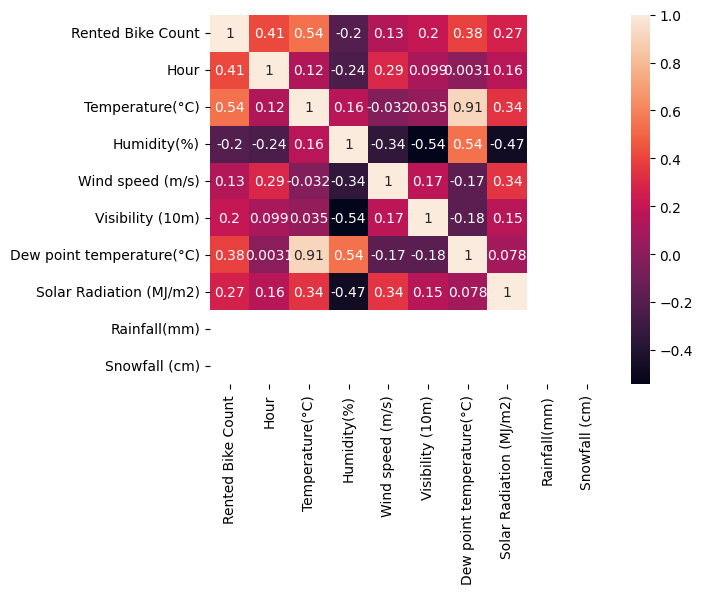

In [33]:
#Korelasyon haritası
import seaborn as sns
sns.heatmap(data.iloc[:,1:11].corr(),annot=True)

In [34]:
#Korelasyonu en düşük Wind Speed sütununu çıkarttık
from sklearn.metrics import r2_score
X=X[['Hour', 'Temperature(°C)', 'Humidity(%)','Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Seasons', 'Holiday', 'Functioning Day']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
#Modeli tekrar kuruyoruz ve hata metriklerini hesaplıyoruz
model=sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)
rmse=[]
mse=[]
r2=[]
rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
mse.append(mean_squared_error(y_test, y_pred))
r2.append(r2_score(y_test,y_pred))

In [35]:
#Veriyi scale ediyoruz
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
y = np.array(y).reshape(-1, 1)
scaled_y=scaler.fit_transform(y)


scaled_X_train,scaled_X_test,scaled_y_train,scaled_y_test=train_test_split(scaled_X,scaled_y,test_size=0.20)

In [36]:
#Scale edilmiş veriyle lineer regresyonu tekrar kuruyoruz
model=sm.OLS(scaled_y_train,scaled_X_train).fit()
scaled_y_pred = model.predict(scaled_X_test)
rmse.append(np.sqrt(mean_squared_error(scaled_y_test, scaled_y_pred)))
mse.append(mean_squared_error(scaled_y_test, scaled_y_pred))
r2.append(r2_score(scaled_y_test,scaled_y_pred))

In [37]:
#Orjinal ve scale data ile hatam metriklerini kıyaslıyoruz
hata_metrikleri=pd.DataFrame({"RMSE":rmse,"MSE":mse,"R2":r2},index=['Original Data','Scaled Data'])
hata_metrikleri

,RMSE,MSE,R2
Original Data,434.346886,188657.217637,0.554207
Scaled Data,0.124062,0.015391,0.521544


## Task 3

In [38]:
#Scaled data ile Decision Tree modeli kuruyoruz ve hata metriklerini gösteriyoruz
model=DecisionTreeRegressor().fit(scaled_X_train,scaled_y_train)
y_pred=model.predict(scaled_X_test)
mse=mean_squared_error(scaled_y_test,y_pred)
rmse=np.sqrt(mse)
r2=model.score(scaled_X_test,scaled_y_test)
hata_metrikleri2=pd.DataFrame({"RMSE":rmse,"MSE":mse,"R2":r2},index=range(1))
hata_metrikleri2

,RMSE,MSE,R2
0,0.094188,0.008871,0.724225


## Task 4

In [39]:
#Lineer regresyon ve Decision Tree modellerinin hata metriklerini kıyaslıyoruz
results=pd.DataFrame(hata_metrikleri.iloc[1,:])
results.columns=["Linear Regression"]
results["Decision Tree"]=[hata_metrikleri2.iloc[0,0],hata_metrikleri2.iloc[0,1],hata_metrikleri2.iloc[0,2]]
results

,Linear Regression,Decision Tree
RMSE,0.124062,0.094188
MSE,0.015391,0.008871
R2,0.521544,0.724225
